In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
names1880=pd.read_csv(r'D:\learning\PythonLearning\analysisData\Review&Test\pydata-book\datasets\babynames\yob1880.txt',
                      names=['name','sex','births'])

In [8]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [9]:
names1880.groupby('sex')[['births']].sum()

,births
sex,
F,90993
M,110493


In [10]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']
for year in years:
    path=r'D:\learning\PythonLearning\analysisData\Review&Test\pydata-book\datasets\babynames\yob%d.txt'%year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    pieces.append(frame)

In [11]:
names=pd.concat(pieces,ignore_index=True)

In [12]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [13]:
total_births=names.pivot_table(values='births',index='year',columns='sex',aggfunc='sum')

In [14]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


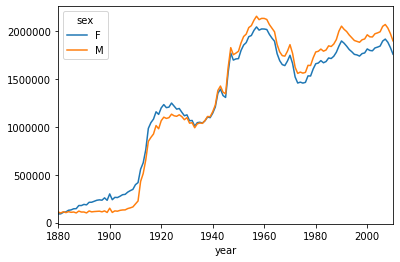

In [15]:
total_births.plot()

In [16]:
def add_prop(group):
    group['prop']=group['births']/group['births'].sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)

In [17]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
def get_top1000(df):
    return  df.sort_values(by='births',ascending=False)[:1000]
top1000=names.groupby(['year','sex']).apply(get_top1000)


In [19]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [20]:
#删除组索引，里面的列竟然还在，非常奇怪
top1000.reset_index(inplace=True,drop=True)

In [21]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [22]:
top1000.groupby('sex').sum()

,births,year,prop
sex,,,
F,143069617,254569338,120.195516
M,153120008,254789357,125.117735


In [23]:
boys=top1000[top1000['sex']=='M']
girls=top1000[top1000['sex']=='F']
total_births=top1000.pivot_table(values='births',index='year',columns='name',aggfunc='sum')

In [24]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [25]:
subset=total_births[['John','Harry','Marry','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB200ED748>,
      dtype=object)

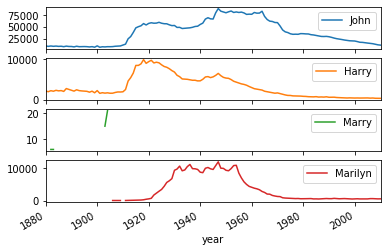

In [26]:
subset.plot(subplots=True)

In [27]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [28]:
table=top1000.pivot_table(values='prop',index='year',columns='sex',aggfunc='sum')

In [29]:
table.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


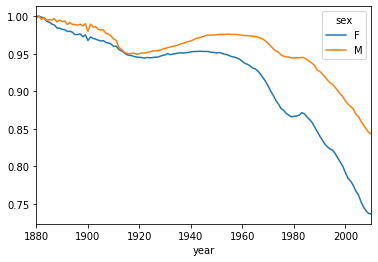

In [30]:
table.plot()

In [31]:
df=boys[boys['year']==2010]

In [32]:
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [33]:
prop_cumsum=df.sort_values(by='prop',ascending=False)['prop'].cumsum()

In [34]:
prop_cumsum.head()


260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
Name: prop, dtype: float64

In [35]:
#这个可以找到series中的到0.5位置
prop_cumsum.values.searchsorted(0.5)

116

In [36]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [37]:
names['last_letter']=names['name'].str.get(-1)

In [38]:
names.head()

,name,sex,births,year,prop,last_letter
0,Mary,F,7065,1880,0.077643,y
1,Anna,F,2604,1880,0.028618,a
2,Emma,F,2003,1880,0.022013,a
3,Elizabeth,F,1939,1880,0.021309,h
4,Minnie,F,1746,1880,0.019188,e


In [49]:
table=names.pivot_table(values='births',index='last_letter',columns=['sex','year'],aggfunc='sum',margins=True)

In [44]:
#使用reindex进行选择,而且这里数字不能打引号
subtable=table.reindex(columns=[1910,1960,2010],level='year')

In [46]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [ ]:
#这里会用列来进行加总，也就是说，索引不会分组，进行加总，在对透视表进行操作时候
subtable.sum()

In [52]:
letter_prop=subtable/subtable.sum()

In [55]:
letter_prop.sum()

sex  year
F    1910    1.0
     1960    1.0
     2010    1.0
M    1910    1.0
     1960    1.0
     2010    1.0
dtype: float64

In [77]:
#这这里非常重要，揭示了切片问题，在高层索引中，loc是采用，先索引，再列切片，而普通切片，是先列再索引，记住了,尽量采用Loc更加规范
letter_prop.loc[['a'],'M']

year,1910,1960,2010
last_letter,,,
a,0.005031,0.00244,0.01498


In [108]:
#这里意思是，只能切片两层，多层受不了，而且索引如果不选，要空出来
letter_prop.loc[:,'M'].loc[:,1910]

last_letter
a    0.005031
b    0.002116
c    0.002482
d    0.113858
e    0.147556
f    0.000783
g    0.002250
h    0.045562
i    0.000844
j         NaN
k    0.036581
l    0.065016
m    0.058044
n    0.143415
o    0.017065
p    0.003172
q         NaN
r    0.064481
s    0.130815
t    0.072879
u    0.000124
v    0.000113
w    0.006329
x    0.003965
y    0.077349
z    0.000170
Name: 1910, dtype: float64

In [110]:
#要一层一层选
letter_prop.loc[:,1910]

KeyError: 1910

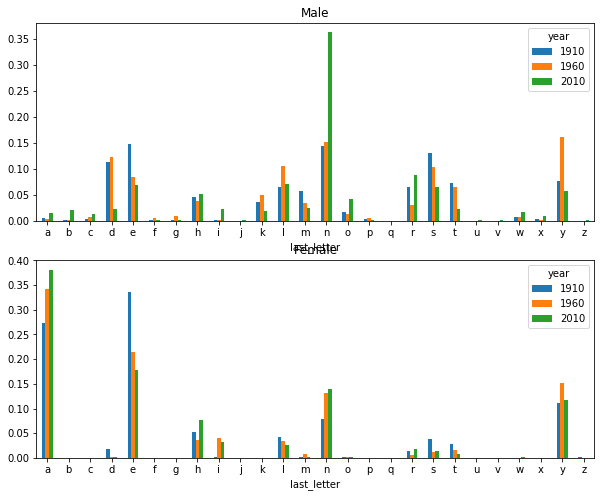

In [111]:
#这里就是画图经验了，如果是多图，就创建子图，然后用ax参数设置位置
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')

In [112]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2002      2003      2004   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   38815.0   37825.0   38650.0   
b                NaN      NaN      NaN  ...   49284.0   48065.0   45914.0   
c                NaN      NaN      NaN  ...   27238.0   27697.0   26778.0   
d             1027.0   1298.0   1374.0  ...   55829.0   53391.0   51754.0   
e            54353.0  66750.0  66663.0  ...  144651.0  144769.0  142098.0   

sex                                                                      \
year             2005      2006      2007      2008      2009      2010   
last_letter                                                               
a             36838.0   36156.0   34654.0   32901.0   31430.0   28438.0   
b             43144.0   42600.0   42123.0   39945.0   38862.0   38859.0   
c             26078.0   26635.0   26864.0   25318.0   24048.0   23125.0   
d             50670.0   51410.0   50595.0   47910.0   46172.0   44398.0   
e            141123.0  142999.0  143698.0  140966.0  135496.0  129012.0   

sex               All  
year                   
last_letter            
a            55876394  
b             1256386  
c             1553880  
d            16882534  
e            49410502  

[5 rows x 263 columns]

In [113]:
table.sum()

sex  year
F    1880       181986.0
     1881       183910.0
     1882       215702.0
     1883       224644.0
     1884       258042.0
     1885       266112.0
     1886       289076.0
     1887       291966.0
     1888       357262.0
     1889       356738.0
     1890       380754.0
     1891       370972.0
     1892       424700.0
     1893       425816.0
     1894       445846.0
     1895       467264.0
     1896       475848.0
     1897       468398.0
     1898       517542.0
     1899       466044.0
     1900       599746.0
     1901       478702.0
     1902       528158.0
     1903       523952.0
     1904       550750.0
     1905       583282.0
     1906       590602.0
     1907       637116.0
     1908       668554.0
     1909       694382.0
                ...     
M    1982      3625284.0
     1983      3581340.0
     1984      3605470.0
     1985      3692324.0
     1986      3678884.0
     1987      3730226.0
     1988      3823716.0
     1989      3999680.0
     1990      

In [114]:
letter_prop=table/table.sum()

In [115]:
dny_ts=letter_prop.loc[['d','n','y'],'M']

In [116]:
dny_ts.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
d,0.041528,0.041624,0.042670,0.042033,0.043060,0.042736,0.043824,0.044536,0.043853,0.045967,...,0.015676,0.014397,0.013534,0.013059,0.012710,0.012538,0.012225,0.011787,0.011699,0.011694
n,0.076607,0.076607,0.074780,0.075823,0.074957,0.073180,0.074830,0.074419,0.075643,0.075988,...,0.158748,0.162543,0.168172,0.170576,0.172160,0.175833,0.179137,0.180550,0.181261,0.181385
y,0.037880,0.038725,0.038769,0.039572,0.040203,0.040941,0.040840,0.041435,0.042459,0.043164,...,0.035844,0.034699,0.033098,0.032390,0.031403,0.030169,0.029817,0.030171,0.028612,0.029084


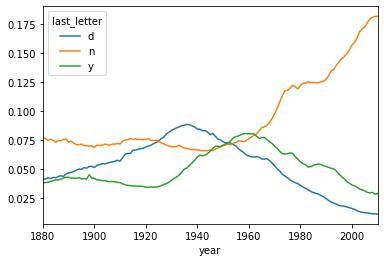

In [118]:
dny_ts.T.plot()

In [120]:
subtable=table

In [121]:
table

sex                F                                                   \
year            1880     1881      1882      1883      1884      1885   
last_letter                                                             
a            31446.0  31581.0   36536.0   38330.0   43680.0   45408.0   
b                NaN      NaN       NaN       NaN       NaN       NaN   
c                NaN      NaN       5.0       5.0       NaN       NaN   
d              609.0    607.0     734.0     810.0     916.0     862.0   
e            33378.0  34080.0   40399.0   41914.0   48089.0   49616.0   
f                NaN      NaN       NaN       NaN       NaN       NaN   
g                7.0      5.0      12.0       8.0      24.0      11.0   
h             4863.0   4784.0    5567.0    5701.0    6602.0    6624.0   
i               61.0     78.0      81.0      76.0      84.0      92.0   
j                NaN      NaN       NaN       NaN       NaN       NaN   
k               13.0     15.0      11.0      17.0      21.0      18.0   
l             2541.0   2911.0    3527.0    3848.0    4808.0    5144.0   
m               58.0     57.0      81.0      86.0      79.0      75.0   
n             3008.0   2959.0    3576.0    3837.0    4507.0    4735.0   
o               30.0     49.0      35.0      47.0      74.0      84.0   
p                NaN      NaN       NaN       NaN       NaN       NaN   
q                NaN      NaN       NaN       NaN       NaN       NaN   
r              481.0    417.0     590.0     640.0     718.0     799.0   
s             1391.0   1316.0    1637.0    1794.0    2039.0    2127.0   
t             2152.0   2165.0    2399.0    2554.0    2825.0    2889.0   
u              380.0    427.0     410.0     444.0     490.0     495.0   
v                NaN      NaN       NaN       NaN       NaN       NaN   
w                NaN      5.0       NaN       NaN       NaN       NaN   
x                NaN      NaN       NaN       7.0       NaN       NaN   
y            10469.0  10404.0   12145.0   12063.0   13917.0   13927.0   
z              106.0     95.0     106.0     141.0     148.0     150.0   
All          90993.0  91955.0  107851.0  112322.0  129021.0  133056.0   

sex                                                  ...          M  \
year             1886      1887      1888      1889  ...       2002   
last_letter                                          ...              
a             49100.0   48942.0   59442.0   58631.0  ...    38815.0   
b                 NaN       NaN       NaN       NaN  ...    49284.0   
c                 NaN       NaN       NaN       NaN  ...    27238.0   
d              1007.0    1027.0    1298.0    1374.0  ...    55829.0   
e             53884.0   54353.0   66750.0   66663.0  ...   144651.0   
f                 NaN       NaN       NaN       NaN  ...     1817.0   
g                18.0      25.0      44.0      28.0  ...     2084.0   
h              7146.0    7141.0    8630.0    8826.0  ...    88085.0   
i                85.0     105.0     141.0     134.0  ...    23610.0   
j                 NaN       NaN       NaN       NaN  ...     1088.0   
k                27.0      19.0      21.0      22.0  ...    42043.0   
l              5721.0    6175.0    7900.0    8395.0  ...   153493.0   
m               103.0      90.0     123.0     137.0  ...    42663.0   
n              5242.0    5512.0    6833.0    7103.0  ...   630322.0   
o                93.0      97.0     134.0     142.0  ...    83180.0   
p                 NaN       NaN       NaN       NaN  ...     3157.0   
q                 NaN       NaN       NaN       NaN  ...      618.0   
r               917.0     910.0    1207.0    1214.0  ...   164821.0   
s              2524.0    2803.0    3582.0    3569.0  ...   139595.0   
t              3017.0    3140.0    3816.0    3784.0  ...    44991.0   
u               511.0     476.0     541.0     469.0  ...     1819.0   
v                 NaN       NaN       NaN       NaN  ...     1332.0   
w                 5.0       NaN   

In [129]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2002      2003      2004   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   38815.0   37825.0   38650.0   
b                NaN      NaN      NaN  ...   49284.0   48065.0   45914.0   
c                NaN      NaN      NaN  ...   27238.0   27697.0   26778.0   
d             1027.0   1298.0   1374.0  ...   55829.0   53391.0   51754.0   
e            54353.0  66750.0  66663.0  ...  144651.0  144769.0  142098.0   

sex                                                                      \
year             2005      2006      2007      2008      2009      2010   
last_letter                                                               
a             36838.0   36156.0   34654.0   32901.0   31430.0   28438.0   
b             43144.0   42600.0   42123.0   39945.0   38862.0   38859.0   
c             26078.0   26635.0   26864.0   25318.0   24048.0   23125.0   
d             50670.0   51410.0   50595.0   47910.0   46172.0   44398.0   
e            141123.0  142999.0  143698.0  140966.0  135496.0  129012.0   

sex               All  
year                   
last_letter            
a            55876394  
b             1256386  
c             1553880  
d            16882534  
e            49410502  

[5 rows x 263 columns]